# Introduction
- KaggleのNMRコンペ(https://www.kaggle.com/c/champs-scalar-coupling/data)

# Let's import everything I nead :)

In [12]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp

# Data Preparation

**check datasets**

In [2]:
dir_data = './data/champs-scalar-coupling/'
path_list = glob.glob(dir_data + '*')
path_list

['./data/champs-scalar-coupling/magnetic_shielding_tensors.csv',
 './data/champs-scalar-coupling/structures.csv',
 './data/champs-scalar-coupling/mulliken_charges.csv',
 './data/champs-scalar-coupling/scalar_coupling_contributions.csv',
 './data/champs-scalar-coupling/train.csv',
 './data/champs-scalar-coupling/structures',
 './data/champs-scalar-coupling/test.csv',
 './data/champs-scalar-coupling/sample_submission.csv',
 './data/champs-scalar-coupling/dipole_moments.csv',
 './data/champs-scalar-coupling/potential_energy.csv']

**load csv**

In [3]:
path = './data/champs-scalar-coupling/mulliken_charges.csv'
df = pd.read_csv(path)

# Pandas Plofiling

In [4]:
pdp.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


Number of variables,3
Number of observations,1533537
Total Missing (%),0.0%
Total size in memory,35.1 MiB
Average record size in memory,24.0 B
Numeric,2
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# EDA: mulliken_charges.csv
- null なし

---

## Basics

In [5]:
df.head(5)

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


In [6]:
df.tail(5)

,molecule_name,atom_index,mulliken_charge
1533532,dsgdb9nsd_133884,13,0.087616
1533533,dsgdb9nsd_133884,14,0.104858
1533534,dsgdb9nsd_133884,15,0.104858
1533535,dsgdb9nsd_133884,16,0.067157
1533536,dsgdb9nsd_133884,17,0.090746


---> molecule_name 名にダブりあり

In [7]:
molecule_name_list = df['molecule_name'].unique()
print('n_molecule_name: ', len(molecule_name_list))

n_molecule_name:  85003


--->この数は、dipole_moments のときの、molecule_name 数と一緒
---> molecule の数は、85003個と考えてよさそう

In [8]:
df.isnull().sum(axis=0)

molecule_name      0
atom_index         0
mulliken_charge    0
dtype: int64

## Plot

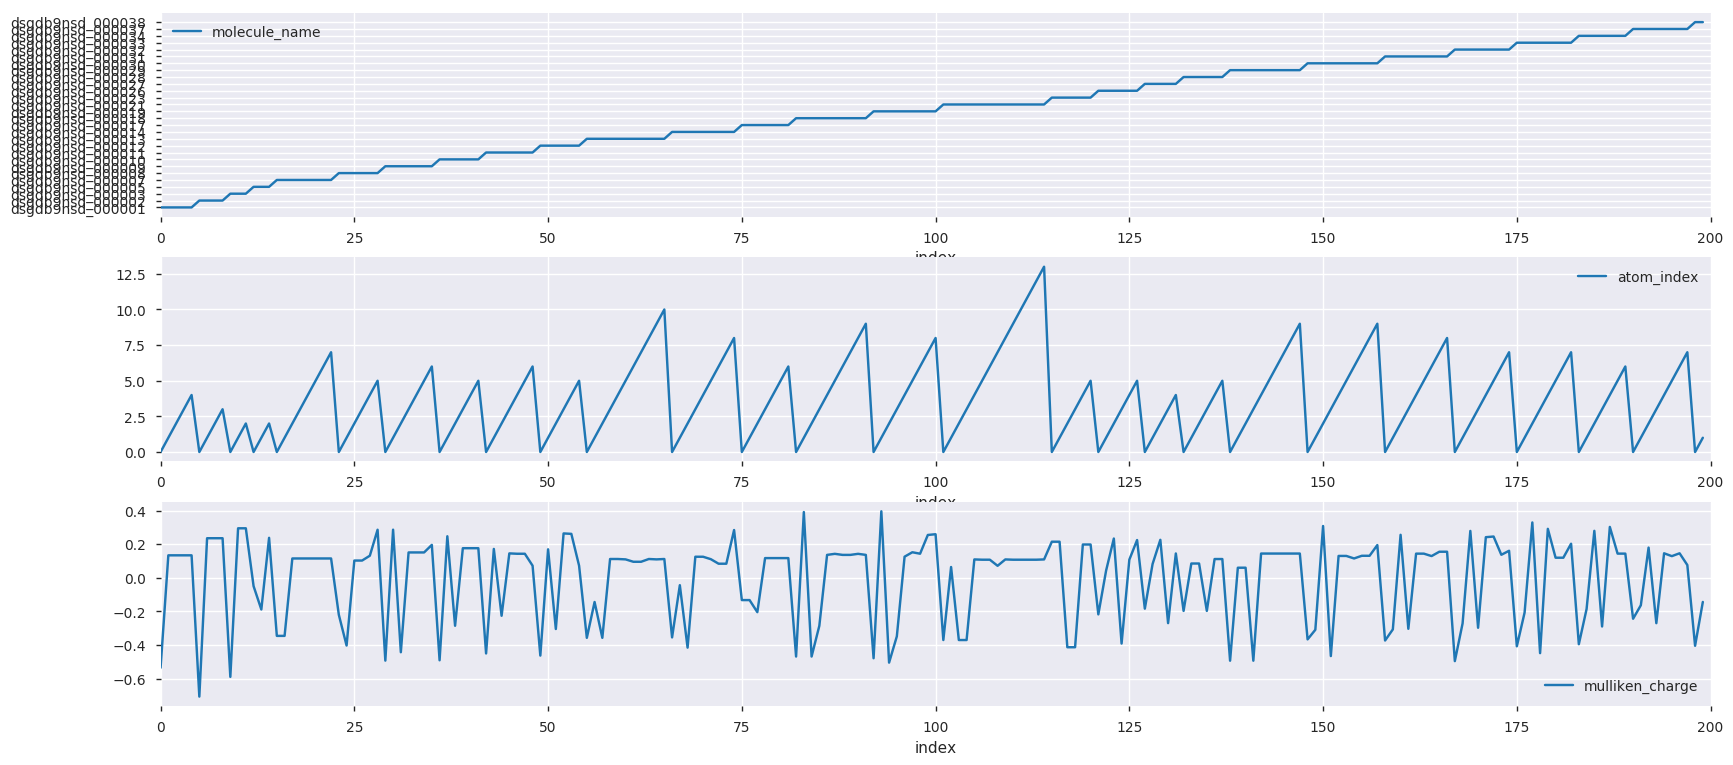

In [18]:
df_small = df.iloc[0:200,:]
fig, axs = plt.subplots(len(df_small.columns),1, figsize=(20, 9))
axs = axs.ravel()
for i in range(len(df_small.columns)):
    if df.iloc[0, i] == str:
        break
    axs[i].set_xlim(0, 200)
    axs[i].plot(df_small.iloc[:,i], label=df_small.columns[i])
    axs[i].set_xlabel('index')
    axs[i].legend()